<a href="https://colab.research.google.com/github/hemachithrav/GenAI-Learning-Resource/blob/main/Data_Preprocessing_and_Cleaning_Commands.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Data Import**

<details>
<summary>Click to expand!</summary>


In This Section we have Imported IMDB 50K Review Dataset from Kaggle
</details>

*   Importing Data From *Kaggle* Using **Kaggle API**




In [1]:
import kagglehub
import pandas as pd

In [2]:
# Download latest version
data_path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")

print("Path to dataset files:", data_path)

100%|██████████| 25.7M/25.7M [00:00<00:00, 74.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/versions/1


In [3]:
!pwd

/content


In [4]:
import os

directory_path = '/root/.cache/kagglehub/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/versions/1/'
print(os.listdir(directory_path))

['IMDB Dataset.csv']


In [5]:
df=pd.read_csv(directory_path+'/IMDB Dataset.csv')

In [6]:
df.shape

(50000, 2)

In [7]:
tr_df=df.head(100)

In [8]:
tr_df.shape

(100, 2)

In [9]:
tr_df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
95,Daniel Day-Lewis is the most versatile actor a...,positive
96,My guess would be this was originally going to...,negative
97,"Well, I like to watch bad horror B-Movies, cau...",negative
98,"This IS the worst movie I have ever seen, as w...",negative


#**Data Preprocessing**

##lower Case

* To avoid duplication

In [10]:
tr_df['review'][3]

"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them."

In [11]:
tr_df['review']=tr_df['review'].str.lower()

<ipython-input-11-d98c9a02e076>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tr_df['review']=tr_df['review'].str.lower()


In [12]:
tr_df['review'][3]

"basically there's a family where a little boy (jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />this movie is slower than a soap opera... and suddenly, jake decides to become rambo and kill the zombie.<br /><br />ok, first of all when you're going to make a film you must decide if its a thriller or a drama! as a drama the movie is watchable. parents are divorcing & arguing like in real life. and then we have jake with his closet which totally ruins all the film! i expected to see a boogeyman similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. as for the shots with jake: just ignore them."

## To Remove Tags Using Regular Expressions

Custom function for Removing Html tags



In [13]:
import re

def remove_html_tags(raw_text):
    pattern=re.compile('<.*?>')
    return pattern.sub(r'',raw_text)

In [14]:
tr_df['review']=tr_df['review'].apply(remove_html_tags)

<ipython-input-14-d3271d7786cd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tr_df['review']=tr_df['review'].apply(remove_html_tags)


In [15]:
tr_df['review'][3]

"basically there's a family where a little boy (jake) thinks there's a zombie in his closet & his parents are fighting all the time.this movie is slower than a soap opera... and suddenly, jake decides to become rambo and kill the zombie.ok, first of all when you're going to make a film you must decide if its a thriller or a drama! as a drama the movie is watchable. parents are divorcing & arguing like in real life. and then we have jake with his closet which totally ruins all the film! i expected to see a boogeyman similar movie, and instead i watched a drama with some meaningless thriller spots.3 out of 10 just for the well playing parents & descent dialogs. as for the shots with jake: just ignore them."

## Remove URL

In [16]:
def remove_url(text):
  pattern=re.compile(r'https?://\S+|www\.\S+')
  return pattern.sub(r'',text)

In [17]:
tr_df['review']=tr_df['review'].apply(remove_url)

<ipython-input-17-ba06634cae1c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tr_df['review']=tr_df['review'].apply(remove_url)


In [18]:
text1 = 'Check out my youtube https://www.youtube.com/dswithbappy dswithbappy'
text2 = 'Check out my linkedin https://www.linkedin.com/in/boktiarahmed73/'
text3 = 'Google search here www.google.com'
text4 = 'For data click https://www.kaggle.com/'

In [19]:
remove_url(text2)

'Check out my linkedin '

##Punctuation handling

In [20]:
import string,time
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [21]:
exclude=string.punctuation
exclude

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [22]:
def remove_punc(text):
  for char in exclude:
    text=text.replace(char,'')
  return text

In [23]:
text = 'string. With. Punctuation?'

In [24]:
remove_punc(text)

'string With Punctuation'

In [25]:
start = time.time()
print(remove_punc(text))
time1 = time.time() - start
print(time1*50000)

string With Punctuation
51.55801773071289


In [26]:
def remove_punc1(text):
    return text.translate(str.maketrans('', '', exclude))

In [27]:
start = time.time()
remove_punc1(text)
time2 = time.time() - start   # This method takes less time to compute using function
print(time2*50000)

4.184246063232422


In [28]:
time1/time2

12.321937321937321

In [29]:
tr_df['review'][5]

'probably my all-time favorite movie, a story of selflessness, sacrifice and dedication to a noble cause, but it\'s not preachy or boring. it just never gets old, despite my having seen it some 15 or more times in the last 25 years. paul lukas\' performance brings tears to my eyes, and bette davis, in one of her very few truly sympathetic roles, is a delight. the kids are, as grandma says, more like "dressed-up midgets" than children, but that only makes them more fun to watch. and the mother\'s slow awakening to what\'s happening in the world and under her own roof is believable and startling. if i had a dozen thumbs, they\'d all be "up" for this movie.'

In [30]:
remove_punc1(tr_df['review'][5])

'probably my alltime favorite movie a story of selflessness sacrifice and dedication to a noble cause but its not preachy or boring it just never gets old despite my having seen it some 15 or more times in the last 25 years paul lukas performance brings tears to my eyes and bette davis in one of her very few truly sympathetic roles is a delight the kids are as grandma says more like dressedup midgets than children but that only makes them more fun to watch and the mothers slow awakening to whats happening in the world and under her own roof is believable and startling if i had a dozen thumbs theyd all be up for this movie'

##chat_conversion handle

* This function helps us to replace the key and its correspondent value in dictionary used for handling Chat convos

In [31]:
chat_words = {
    'AFAIK':'As Far As I Know',
    'AFK':'Away From Keyboard',
    'ASAP':'As Soon As Possible',
    "FYI": "For Your Information",
    "ASAP": "As Soon As Possible",
    "BRB": "Be Right Back",
    "BTW": "By The Way",
    "OMG": "Oh My God",
    "IMO": "In My Opinion",
    "LOL": "Laugh Out Loud",
    "TTYL": "Talk To You Later",
    "GTG": "Got To Go",
    "TTYT": "Talk To You Tomorrow",
    "IDK": "I Don't Know",
    "TMI": "Too Much Information",
    "IMHO": "In My Humble Opinion",
    "ICYMI": "In Case You Missed It",
    "AFAIK": "As Far As I Know",
    "BTW": "By The Way",
    "FAQ": "Frequently Asked Questions",
    "TGIF": "Thank God It's Friday",
    "FYA": "For Your Action",
    "ICYMI": "In Case You Missed It",
}

In [32]:
def chat_conversion(text):
    new_text = []
    for w in text.split():
        if w.upper() in chat_words:
            new_text.append(chat_words[w.upper()])
        else:
            new_text.append(w)
    return " ".join(new_text)

In [33]:
chat_conversion('FYI this is an email')

'For Your Information this is an email'

## incorrect_text handling

* Remove any form of spelling mistakes by using this method

In [34]:
from textblob import TextBlob

In [35]:
incorrect_text = 'ceertain conditionas duriing seveal ggenerations aree moodified in the saame maner.'

textBlb = TextBlob(incorrect_text)

textBlb.correct().string

'certain conditions during several generations are modified in the same manner.'

## stopwords

Remove stopwords which is of no use using nlp packages and to remove curse of vector dimensionality

In [36]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [37]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [38]:
len(stopwords.words('english'))

179

In [39]:
def remove_stopwords(text):
    new_text = []

    for word in text.split():
        if word in stopwords.words('english'):
            new_text.append('')
        else:
            new_text.append(word)
    x = new_text[:]
    new_text.clear()
    return " ".join(x)

In [40]:
remove_stopwords('probably my all-time favorite movie, a story of selflessness, sacrifice and dedication to a noble cause, but it\'s not preachy or boring. it just never gets old, despite my having seen it some 15 or more times')

'probably  all-time favorite movie,  story  selflessness, sacrifice  dedication   noble cause,    preachy  boring.   never gets old, despite   seen   15   times'

##remove_emoji handle

In [41]:
import re
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [42]:
remove_emoji("Loved the movie. It was 😘😘")

'Loved the movie. It was '

In [43]:
remove_emoji("BTS 💜")

'BTS '

##To Handle Emoji's

- Incase of Social Media Datasets. We make use of Emoji package .

In [44]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 9.4 MB/s eta 0:00:00


In [45]:
import emoji
print(emoji.demojize('Python is 🔥'))

Python is :fire:


In [46]:
print(emoji.demojize('We are Seven 🫂'))

We are Seven :people_hugging:


##Tokenization:

--> To Break Sentences to individual words.

###1. Using the split function

In [47]:
# Word Tokenization
sent1=" Iam at Chennai"
sent1.split()


['Iam', 'at', 'Chennai']

In [48]:
#Sentence Tokenization

sent2="I want to become Data scientist.I want to earn good"
sent2.split('.')

['I want to become Data scientist', 'I want to earn good']

In [49]:
# Problems with split function
sent3 = 'I am going to delhi!'  # Doesnt split the punctuation from a Word totally.
sent3.split()

['I', 'am', 'going', 'to', 'delhi!']

###2. Regular Expression

In [50]:
import re
sent3 = 'I am going to delhi!'
tokens = re.findall("[\w']+", sent3)
tokens

['I', 'am', 'going', 'to', 'delhi']

In [51]:
text = """Lorem Ipsum is simply dummy text of the printing and typesetting industry?
Lorem Ipsum has been the industry's standard dummy text ever since the 1500s,
when an unknown printer took a galley of type and scrambled it to make a type specimen book."""
sentences = re.compile('[.!?] ').split(text)
sentences

["Lorem Ipsum is simply dummy text of the printing and typesetting industry?\nLorem Ipsum has been the industry's standard dummy text ever since the 1500s,\nwhen an unknown printer took a galley of type and scrambled it to make a type specimen book."]

###3.Using NLTK Package-->word and sent tokenize

In [52]:
from nltk.tokenize import word_tokenize,sent_tokenize
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [53]:
sent1 = 'I am going to visit delhi!'
word_tokenize(sent1)

['I', 'am', 'going', 'to', 'visit', 'delhi', '!']

In [54]:
text = """Lorem Ipsum is simply dummy text of the printing and typesetting industry?
Lorem Ipsum has been the industry's standard dummy text ever since the 1500s,
when an unknown printer took a galley of type and scrambled it to make a type specimen book."""

sent_tokenize(text)

['Lorem Ipsum is simply dummy text of the printing and typesetting industry?',
 "Lorem Ipsum has been the industry's standard dummy text ever since the 1500s,\nwhen an unknown printer took a galley of type and scrambled it to make a type specimen book."]

###4.spacy(good)

In [55]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [56]:
doc4 = nlp(sent1)
doc4

I am going to visit delhi!

In [57]:
for token in doc4:
    print(token)

I
am
going
to
visit
delhi
!


##Stemming: Reduce words to Root words

In [58]:
from nltk.stem.porter import PorterStemmer

In [59]:
ps = PorterStemmer()
def stem_words(text):
    return " ".join([ps.stem(word) for word in text.split()])

In [60]:
sample = "walk walks walking walked"
stem_words(sample)

'walk walk walk walk'

In [61]:
text = 'probably my alltime favorite movie a story of selflessness sacrifice and dedication to a noble cause but its not preachy or boring it just never gets old despite my having seen it some 15 or more times in the last 25 years paul lukas performance brings tears to my eyes and bette davis in one of her very few truly sympathetic roles is a delight the kids are as grandma says more like dressedup midgets than children but that only makes them more fun to watch and the mothers slow awakening to whats happening in the world and under her own roof is believable and startling if i had a dozen thumbs theyd all be up for this movie'
print(text)

probably my alltime favorite movie a story of selflessness sacrifice and dedication to a noble cause but its not preachy or boring it just never gets old despite my having seen it some 15 or more times in the last 25 years paul lukas performance brings tears to my eyes and bette davis in one of her very few truly sympathetic roles is a delight the kids are as grandma says more like dressedup midgets than children but that only makes them more fun to watch and the mothers slow awakening to whats happening in the world and under her own roof is believable and startling if i had a dozen thumbs theyd all be up for this movie


In [62]:
stem_words(text)

'probabl my alltim favorit movi a stori of selfless sacrific and dedic to a nobl caus but it not preachi or bore it just never get old despit my have seen it some 15 or more time in the last 25 year paul luka perform bring tear to my eye and bett davi in one of her veri few truli sympathet role is a delight the kid are as grandma say more like dressedup midget than children but that onli make them more fun to watch and the mother slow awaken to what happen in the world and under her own roof is believ and startl if i had a dozen thumb theyd all be up for thi movi'

##Lemmatization: Root word remains gramatically correct unlike stemming

In [63]:

import nltk
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
wordnet_lemmatizer = WordNetLemmatizer()

sentence = "He was running and eating at same time. He has bad habit of swimming after playing long hours in the Sun."
punctuations="?:!.,;"
sentence_words = nltk.word_tokenize(sentence)
for word in sentence_words:
    if word in punctuations:
        sentence_words.remove(word)

sentence_words
print("{0:20}{1:20}".format("Word","Lemma"))
for word in sentence_words:
    print ("{0:20}{1:20}".format(word,wordnet_lemmatizer.lemmatize(word,pos='v')))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Word                Lemma               
He                  He                  
was                 be                  
running             run                 
and                 and                 
eating              eat                 
at                  at                  
same                same                
time                time                
He                  He                  
has                 have                
bad                 bad                 
habit               habit               
of                  of                  
swimming            swim                
after               after               
playing             play                
long                long                
hours               hours               
in                  in                  
the                 the                 
Sun                 Sun                 


**NOTE: Stemming & lamatization are same to retrieve root words but lamatization is worked good. Lamatization is slow & stemming is fast**

#Data Representation or Feature Engineering

- OneHotEncoding: Not advisable to use
-BagOfWords: works based on no of occurence

##bagOfWords

In [64]:
import numpy as np
import pandas as pd

In [65]:
df = pd.DataFrame({"text":["bts favorite group",
                         "bts  group favorite",
                         "group best group",
                          "bts everyone favorite"],"output":[1,1,0,0]}) #eg sentiment 1- pos 0-neg

df

,text,output
0,bts favorite group,1
1,bts group favorite,1
2,group best group,0
3,bts everyone favorite,0


In [66]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [67]:
bow = cv.fit_transform(df['text'])

In [68]:
#vocabulary      #compare the index with occurence first best is checked and it goes till group
print(cv.vocabulary_)

{'bts': 1, 'favorite': 3, 'group': 4, 'best': 0, 'everyone': 2}


In [69]:
bow.toarray()

array([[0, 1, 0, 1, 1],
       [0, 1, 0, 1, 1],
       [1, 0, 0, 0, 2],
       [0, 1, 1, 1, 0]])

In [70]:
print(bow[0].toarray())
print(bow[1].toarray())
print(bow[2].toarray())
print(bow[3].toarray())

[[0 1 0 1 1]]
[[0 1 0 1 1]]
[[1 0 0 0 2]]
[[0 1 1 1 0]]


In [71]:
#New sentence

cv.transform(['bts best best group']).toarray()

array([[2, 1, 0, 0, 1]])

In [72]:
X = bow.toarray()
y = df['output']

In [73]:
df = pd.DataFrame(X,y) #eg sentiment 1- pos 0-neg

df



,0,1,2,3,4
output,,,,,
1,0,1,0,1,1
1,0,1,0,1,1
0,1,0,0,0,2
0,0,1,1,1,0


##N-grams

-For considering two words or three words at a time for BOW inorder to obtain hidden features as well.

In [74]:
df = pd.DataFrame({"text":["bts favorite group",
                         "bts  group favorite",
                         "group best group",
                          "bts everyone favorite"],"output":[1,1,0,0]}) #eg sentiment 1- pos 0-neg

df

,text,output
0,bts favorite group,1
1,bts group favorite,1
2,group best group,0
3,bts everyone favorite,0


In [75]:
# BI grams
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(2,2))

In [76]:
bow=cv.fit_transform(df['text'])

In [77]:
print(cv.vocabulary_)  #considers two words at at time to vectorize

{'bts favorite': 2, 'favorite group': 5, 'bts group': 3, 'group favorite': 7, 'group best': 6, 'best group': 0, 'bts everyone': 1, 'everyone favorite': 4}


In [78]:
bow.toarray()

array([[0, 0, 1, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 1, 0, 0, 0]])

In [79]:
#Ti gram
# BI grams
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(3,3))

In [80]:
bow = cv.fit_transform(df['text'])

In [81]:
print(cv.vocabulary_) # considers three words at a time to vectorize

{'bts favorite group': 1, 'bts group favorite': 2, 'group best group': 3, 'bts everyone favorite': 0}



### **TF-IDF (Term Frequency-Inverse Document Frequency)**

- Assignes weights to the words based on the frequency .Not produces sparse matrix.

### 1. Term Frequency (TF):
$$
TF(t, d) = \frac{f(t, d)}{n(d)}
$$

### 2. Inverse Document Frequency (IDF):
$$
IDF(t, D) = \log \left(\frac{N}{1 + n(t)}\right)
$$

### 3. TF-IDF Calculation:
$$
TF\text{-}IDF(t, d, D) = TF(t, d) \cdot IDF(t, D)
$$

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid= TfidfVectorizer()

In [83]:
arr=tfid.fit_transform(df['text']).toarray()

In [84]:
arr

array([[0.        , 0.57735027, 0.        , 0.57735027, 0.57735027],
       [0.        , 0.57735027, 0.        , 0.57735027, 0.57735027],
       [0.61666846, 0.        , 0.        , 0.        , 0.78722298],
       [0.        , 0.47380449, 0.74230628, 0.47380449, 0.        ]])

In [85]:
print(tfid.idf_)

[1.91629073 1.22314355 1.91629073 1.22314355 1.22314355]


##Word2Vec

In [86]:


# Download latest version
path = kagglehub.dataset_download("shubhammaindola/harry-potter-books")

print("Path to dataset files:", path)

100%|██████████| 2.28M/2.28M [00:00<00:00, 107MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/shubhammaindola/harry-potter-books/versions/1


In [87]:
import gensim #word2veclies in gensim library
import os

In [88]:
!pip install --upgrade gensim --user

In [89]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [94]:
directory_path_2 = '/root/.cache/kagglehub/datasets/shubhammaindola/harry-potter-books/versions/1/'
print(os.listdir(directory_path_2))

['06 Harry Potter and the Half-Blood Prince.txt', '01 Harry Potter and the Sorcerers Stone.txt', '05 Harry Potter and the Order of the Phoenix.txt', '02 Harry Potter and the Chamber of Secrets.txt', '07 Harry Potter and the Deathly Hallows.txt', '04 Harry Potter and the Goblet of Fire.txt', '03 Harry Potter and the Prisoner of Azkaban.txt']


In [154]:
story = []
for filename in os.listdir(directory_path_2):
    if filename == '.ipynb_checkpoints':
      continue
    print(f"Processing file: {filename}")
    f = open(os.path.join(directory_path_2,filename))
    corpus = f.read()
    raw_sent = sent_tokenize(corpus)  #tokensizes each sentence
    for sent in raw_sent:
        story.append(simple_preprocess(sent))  #tokenizes each word
# Print the first few processed sentences
print(story[:5])

Processing file: 06 Harry Potter and the Half-Blood Prince.txt
Processing file: 01 Harry Potter and the Sorcerers Stone.txt
Processing file: 05 Harry Potter and the Order of the Phoenix.txt
Processing file: 02 Harry Potter and the Chamber of Secrets.txt
Processing file: 07 Harry Potter and the Deathly Hallows.txt
Processing file: 04 Harry Potter and the Goblet of Fire.txt
Processing file: 03 Harry Potter and the Prisoner of Azkaban.txt
[['it', 'was', 'nearing', 'midnight', 'and', 'the', 'prime', 'minister', 'was', 'sitting', 'alone', 'in', 'his', 'office', 'reading', 'long', 'memo', 'that', 'was', 'slipping', 'through', 'his', 'brain', 'without', 'leaving', 'the', 'slightest', 'trace', 'of', 'meaning', 'behind'], ['he', 'was', 'waiting', 'for', 'call', 'from', 'the', 'president', 'of', 'far', 'distant', 'country', 'and', 'between', 'wondering', 'when', 'the', 'wretched', 'man', 'would', 'telephone', 'and', 'trying', 'to', 'suppress', 'unpleasant', 'memories', 'of', 'what', 'had', 'been

In [153]:
corpus

'Harry Potter was a highly unusual boy in many ways. For one thing, he hated the summer holidays more than any other time of year. For another, he really wanted to do his homework, but was forced to do it in secret, in the dead of night. And he also happened to be a wizard.\n\nIt was nearly midnight, and he was lying on his front in bed, the blankets drawn right over his head like a tent, a torch in one hand and a large leather-bound book (A History of Magic, by Adalbert Waffling) propped open against the pillow. Harry moved the tip of his eagle-feather quill down the page, frowning as he looked for something that would help him write his essay, ‘Witch-Burning in the Fourteenth Century Was Completely Pointless – discuss’.\n\nThe quill paused at the top of a likely-looking paragraph. Harry pushed his round glasses up his nose, moved his torch closer to the book and read:\n\n\n\nNon-magic people (more commonly known as Muggles) were particularly afraid of magic in medieval times, but not

In [155]:
len(story)

66129

In [133]:
story

[['it',
  'was',
  'nearing',
  'midnight',
  'and',
  'the',
  'prime',
  'minister',
  'was',
  'sitting',
  'alone',
  'in',
  'his',
  'office',
  'reading',
  'long',
  'memo',
  'that',
  'was',
  'slipping',
  'through',
  'his',
  'brain',
  'without',
  'leaving',
  'the',
  'slightest',
  'trace',
  'of',
  'meaning',
  'behind'],
 ['he',
  'was',
  'waiting',
  'for',
  'call',
  'from',
  'the',
  'president',
  'of',
  'far',
  'distant',
  'country',
  'and',
  'between',
  'wondering',
  'when',
  'the',
  'wretched',
  'man',
  'would',
  'telephone',
  'and',
  'trying',
  'to',
  'suppress',
  'unpleasant',
  'memories',
  'of',
  'what',
  'had',
  'been',
  'very',
  'long',
  'tiring',
  'and',
  'difficult',
  'week',
  'there',
  'was',
  'not',
  'much',
  'space',
  'in',
  'his',
  'head',
  'for',
  'anything',
  'else'],
 ['the',
  'more',
  'he',
  'attempted',
  'to',
  'focus',
  'on',
  'the',
  'print',
  'on',
  'the',
  'page',
  'before',
  'him',
  

In [135]:
# Train Word2Vec model on the story data
model = gensim.models.Word2Vec(sentences=story, vector_size=100, window=5, min_count=2, workers=4) # Train a Word2Vec model on the tokenized sentences with specified vector size, context window, minimum word frequency, and worker threads

# Save the model for reuse
model.save("harry_potter_characters.model")


In [136]:
# Load the model (optional if already in memory)
model = gensim.models.Word2Vec.load("harry_potter_characters.model")

# Example: Find characters similar to 'Harry'
similar_characters = model.wv.most_similar('harry', topn=5) #wv-->word vectors. It provides access to the trained word embeddings (vectors) of the model and allows you to interact with them efficiently.
print("Characters similar to Harry:", similar_characters)

Characters similar to Harry: [('he', 0.7172144055366516), ('ron', 0.635833740234375), ('then', 0.6221091747283936), ('again', 0.6218743324279785), ('neville', 0.5989238023757935)]


In [110]:
model.wv.similarity('harry','hagrid')

0.5364764

In [137]:
model.wv['deep'].shape

(100,)

In [138]:
vec = model.wv.get_normed_vectors() #vector representation of the story

In [139]:
vec

array([[-0.01888066, -0.077053  ,  0.0128574 , ..., -0.02937941,
        -0.0890675 ,  0.14755706],
       [-0.10660908, -0.0780376 ,  0.00238703, ...,  0.04065592,
         0.06734841,  0.07950554],
       [-0.02578636, -0.08973946, -0.03502004, ..., -0.10798148,
         0.13470858, -0.08504488],
       ...,
       [-0.03270704,  0.04504716,  0.05120285, ..., -0.13408959,
         0.08381558, -0.08148196],
       [-0.15498748, -0.01775673,  0.02666465, ..., -0.167029  ,
         0.0804093 ,  0.02044085],
       [-0.1834735 ,  0.1529179 ,  0.08327946, ..., -0.07636313,
        -0.00717173, -0.14586931]], dtype=float32)

In [140]:
model.wv.get_normed_vectors().shape

(14675, 100)

In [141]:
y = model.wv.index_to_key #is a list containing all the words (keys) in the vocabulary of the Word2Vec model, ordered by their frequency of occurrence in the training corpus.

In [142]:
len(y)

14675

In [143]:
from sklearn.decomposition import PCA

In [144]:
pca = PCA(n_components=3) #3 dimensional -- widely used dimensionality reduction technique in machine learning and data analysis.



In [145]:
X = pca.fit_transform(model.wv.get_normed_vectors())

In [146]:
X

array([[ 0.07371467, -0.4393521 , -0.410183  ],
       [ 0.19933182,  0.00452375, -0.3892408 ],
       [-0.40187618, -0.1553595 , -0.58140767],
       ...,
       [ 0.03615162, -0.11384335,  0.02317101],
       [-0.10132182,  0.21929368,  0.11876559],
       [-0.23886175,  0.03920855,  0.23933351]], dtype=float32)

In [147]:
X.shape

(14675, 3)

In [152]:
import plotly.express as px
fig = px.scatter_3d(X[200:300],x=0,y=1,z=2, color=y[200:300])
fig.show()

In [149]:
model.wv.similarity('harry','sirius')

0.5113854

In [150]:
model.wv.similarity('harry','ron')# harry and ron similar so high score

0.63583374

In [151]:
model.wv.similarity('ministry','magic')

0.7628451

In [156]:
model.wv.similarity('dudley','uncle')

0.640794

In [157]:
model.wv.similarity('ron','uncle') #ron and uncle not similar so low score

0.28433412

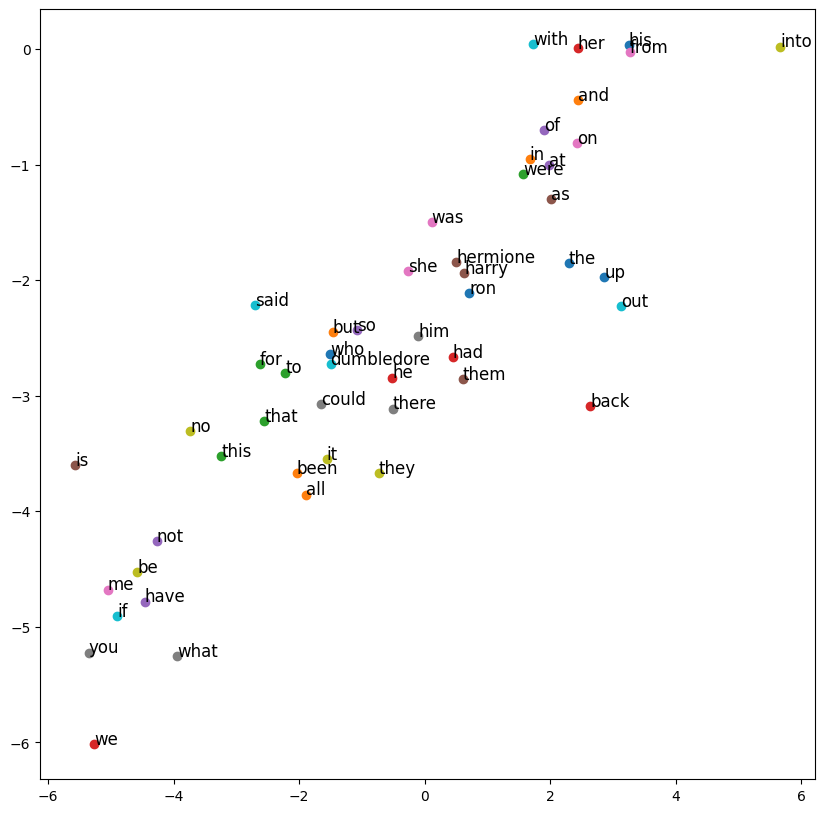

In [158]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to reduce the dimensionality of word vectors
pca = PCA(n_components=2)  # Reduce to 2D for visualization
word_vectors_2d = pca.fit_transform(model.wv[model.wv.index_to_key])

# Visualize the embeddings
plt.figure(figsize=(10, 10))
for i, word in enumerate(model.wv.index_to_key[:50]):  # Visualize the top 50 words
    plt.scatter(word_vectors_2d[i, 0], word_vectors_2d[i, 1])
    plt.text(word_vectors_2d[i, 0], word_vectors_2d[i, 1], word, fontsize=12)
plt.show()